In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Функции для получения csv файлов с данными

In [2]:
# Функция, которя делает из *fn.txt файл csv с данными по энергии и потоками для разных частиц
def make_csv_from_fn(file_name='input/olvemin/gfn'): # for example gfn WITHOUT FORMAT
    file = open(file_name + '.txt')
    lines = file.readlines()
    col_names = lines[11].split()[1:]
    col_names[0] = 'E_MeV'
    
    with open(file_name + '.csv', "w") as csv_file:
        csv_file.write(','.join(col_names).replace('*', ''))
        csv_file.write('\n')
        for i in range(12, len(lines)):
            csv_file.write(','.join(lines[i].split()))
            csv_file.write('\n')

In [3]:
def make_csv_from_pf(file_name='input/olvemin/pf'):
    file = open(file_name + '.txt')
    lines = file.readlines()
    with open(file_name + '.csv', 'w') as csv_file:
        csv_file.write('E_MeV,flux,orbit_flux,peak_flux')
        csv_file.write('\n')
        for i in range(12, len(lines)):
            csv_file.write(','.join(lines[i].split()))
            csv_file.write('\n')

In [4]:
#make_csv_from_fn('input/olvemin/gfn')
#make_csv_from_fn('input/olvemax/gfn')
#make_csv_from_pf('input/olvemin/pf')
#make_csv_from_pf('input/olvemax/pf')

**Все нужные файлы csv были получены ранее, что отражено в закомментированном выше коде!**

## Анализ pf min/max

Построим точки из файлов pf.txt. Скорее всего **p** - это рашифровка - **протон**, а **f** - **flux**

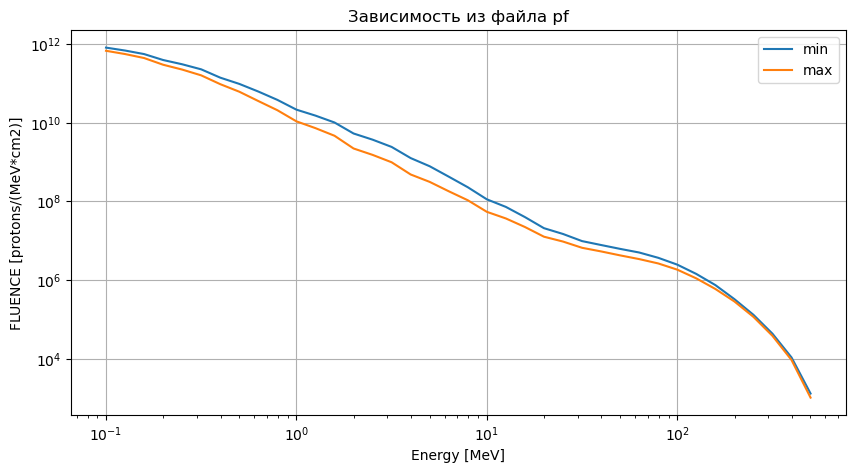

In [5]:
df_min = pd.read_csv('input/olvemin/pf.csv')
df_max = pd.read_csv('input/olvemax/pf.csv')

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_min['E_MeV'], df_min['flux'], label='min')
ax.plot(df_max['E_MeV'], df_max['flux'], label='max')

ax.legend()
ax.grid()

ax.set_title(f'Зависимость из файла pf')
ax.set_ylabel('FLUENCE [protons/(MeV*cm2)]')
ax.set_xlabel('Energy [MeV]')
plt.yscale('log')
plt.xscale('log')

In [6]:
df_min.describe()

,E_MeV,flux,orbit_flux,peak_flux
count,38.000000,3.800000e+01,3.800000e+01,3.800000e+01
mean,64.117293,8.821379e+10,2.418807e+08,3.026937e+05
std,119.054682,1.978515e+11,5.424482e+08,7.695337e+05
min,0.100000,1.320000e+03,3.620000e+00,3.340000e-02
25%,0.845747,5.337500e+06,1.462500e+04,1.605000e+01
50%,7.126450,3.270000e+08,8.985000e+05,4.795000e+02
75%,59.851750,3.377500e+10,9.267500e+07,5.917500e+04
max,501.190000,8.050000e+11,2.210000e+09,3.440000e+06


In [7]:
df_max.describe()

,E_MeV,flux,orbit_flux,peak_flux
count,38.000000,3.800000e+01,3.800000e+01,3.800000e+01
mean,64.117293,6.786506e+10,1.862722e+08,2.919143e+05
std,119.054682,1.600223e+11,4.395406e+08,7.573629e+05
min,0.100000,1.040000e+03,2.860000e+00,2.920000e-02
25%,0.845747,3.637500e+06,9.982500e+03,1.270000e+01
50%,7.126450,1.440000e+08,3.955000e+05,2.530000e+02
75%,59.851750,1.822500e+10,4.990000e+07,3.712500e+04
max,501.190000,6.690000e+11,1.840000e+09,3.400000e+06


## Анализ sfn min/max

In [8]:
df_min_sfn = pd.read_csv('input/olvemin/sfn.csv')
df_max_sfn = pd.read_csv('input/olvemax/sfn.csv')

In [9]:
def draw_el(el='1H'):
    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(df_min_sfn['E_MeV'], df_min_sfn[el], label='min')
    ax.plot(df_max_sfn['E_MeV'], df_max_sfn[el], label='max')

    ax.legend()
    ax.grid()

    ax.set_title(f'Зависимость из файла sfn для {el}')
    ax.set_ylabel('FLUENCE [particles/(MeV/nuclon*cm2)]')
    ax.set_xlabel('Energy [MeV/nuclon]')
    plt.yscale('log')
    plt.xscale('log')

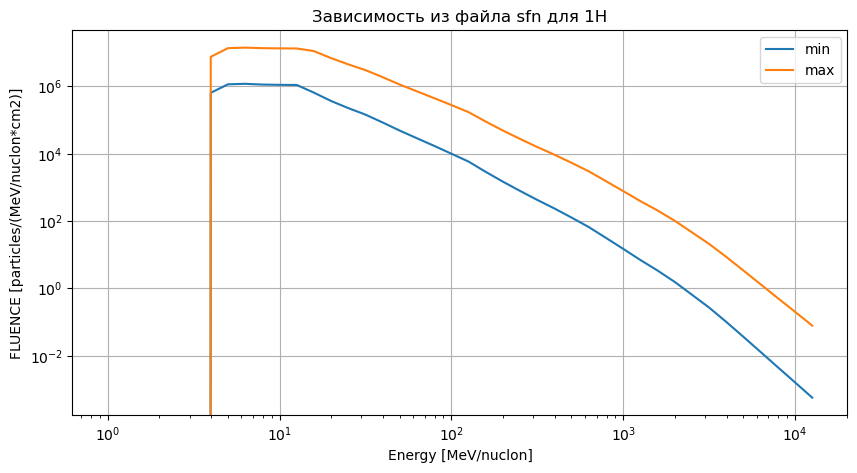

In [10]:
draw_el('1H')

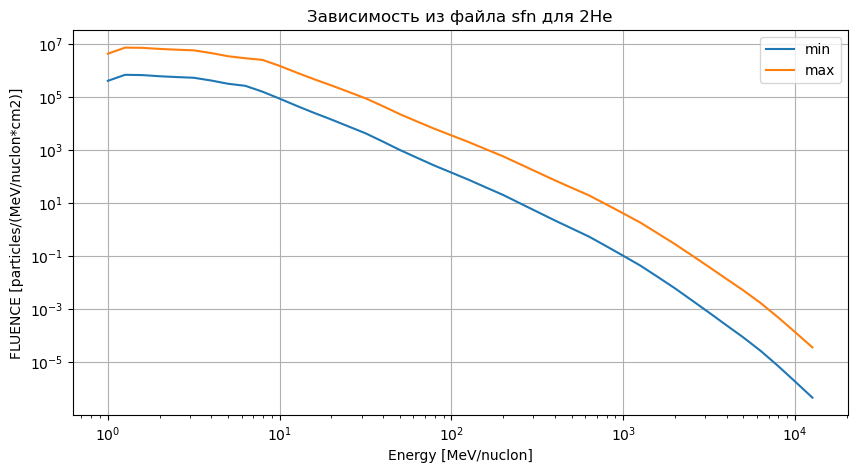

In [11]:
draw_el('2He')

In [12]:
df_min_sfn['E_MeV'].describe()

count       42.000000
mean      1457.315476
std       2881.566361
min          1.000000
25%         10.650000
50%        113.000000
75%       1195.000000
max      12600.000000
Name: E_MeV, dtype: float64

## Анализ для gfn min/max

In [13]:
df_min_gfn = pd.read_csv('input/olvemin/gfn.csv')
df_max_gfn = pd.read_csv('input/olvemax/gfn.csv')

In [14]:
def draw_el(el='1H'):
    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(df_min_gfn['E_MeV'], df_min_gfn[el], label='min')
    ax.plot(df_max_gfn['E_MeV'], df_max_gfn[el], label='max')

    ax.legend()
    ax.grid()

    ax.set_title(f'Зависимость из файла gfn для {el}')
    ax.set_ylabel('FLUENCE [particles/(MeV/nuclon*cm2)]')
    ax.set_xlabel('Energy [MeV/nuclon]')
    plt.yscale('log')
    plt.xscale('log')

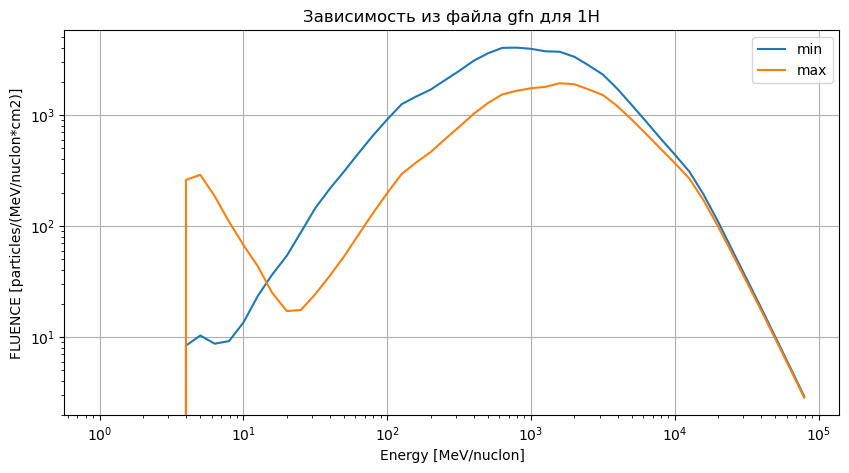

In [15]:
draw_el('1H')

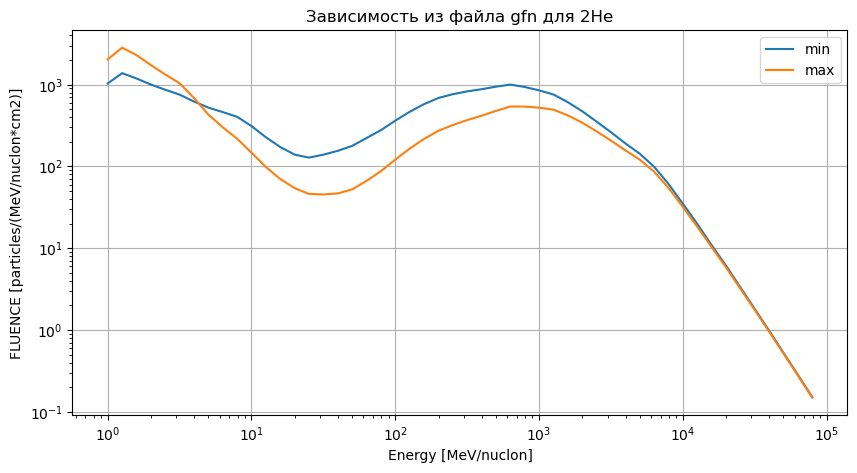

In [16]:
draw_el('2He')

In [17]:
df_min_gfn['E_MeV'].describe()

count       50.000000
mean      7722.145000
std      16967.130598
min          1.000000
25%         16.850000
50%        283.500000
75%       4752.500000
max      79400.000000
Name: E_MeV, dtype: float64